In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
import time
# torch.manual_seed(seed=42)  

In [14]:
def potential(x,k):
    poten=1/2*k*x**2
    return poten

In [15]:
layer_num=3
hidden_num=64
sym='symetry'

class Mynetwork(nn.Module):
    def __init__(self,input_num=1 , out_num=1,hidden_num=64):
        super().__init__()
        self.MLP=nn.Sequential(
            nn.Linear(input_num, hidden_num),
            nn.ELU(),
            nn.Linear(hidden_num,hidden_num),
            nn.ELU(),
            nn.Linear(hidden_num,hidden_num),
            nn.ELU(),
            nn.Linear(hidden_num,out_num),
        )
        pass
    def forward(self,x):
        return self.MLP(x)+self.MLP(-x)

/tmp/ipykernel_1525951/1481812049.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  V_NN=torch.load(f'./V_NN_value_{sym}_{layer_num}_{hidden_num}_{dtype}/V_NN_use_eigvalu

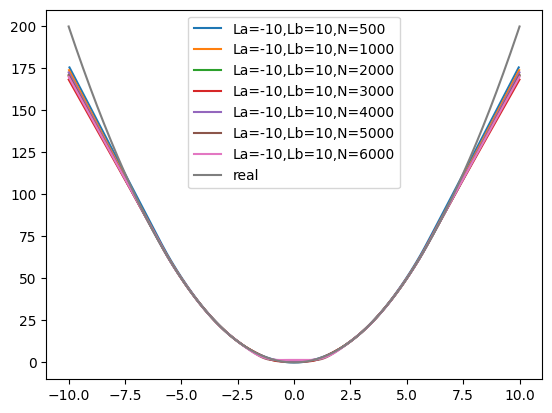

In [19]:
dtype=torch.float32
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
en_num=50
k=4
La=-10
Lb =10
# L=Lb-La  # domain length
# N = 2000   # number of interior points # 对时间成本来说几乎是平方量级
# h :float= L / (N+1)
# grid=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
# grid=grid[1:-1].unsqueeze(-1)
N = 500  # number of interior points # 对时间成本来说几乎是平方量级
grid=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
grid=grid[1:-1].unsqueeze(-1)
V_NN=torch.load(f'./V_NN_value_{sym}_{layer_num}_{hidden_num}_{dtype}/V_NN_use_eigvalues_{en_num}_La{La}_Lb{Lb}_N{N}.pth')
V_NN=V_NN.cpu().detach().numpy()
plt.plot(grid.cpu().detach().numpy(),V_NN,label=f'La={La},Lb={Lb},N={N}')

for i in range(1,7):
    N = 1000*i  # number of interior points # 对时间成本来说几乎是平方量级
    grid=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
    grid=grid[1:-1].unsqueeze(-1)
    V_NN=torch.load(f'./V_NN_value_{sym}_{layer_num}_{hidden_num}_{dtype}/V_NN_use_eigvalues_{en_num}_La{La}_Lb{Lb}_N{N}.pth')
    V_NN=V_NN.cpu().detach().numpy()
    plt.plot(grid.cpu().detach().numpy(),V_NN,label=f'La={La},Lb={Lb},N={N}')


real_poten=potential(grid.cpu().detach().numpy(),k)
plt.plot(grid.cpu().detach().numpy(),real_poten,label='real')
plt.legend()
plt.show()

In [17]:
'''
1000
epoch: 2999
tensor([ 1.3003,  2.9998,  4.9288,  6.9478,  8.9883, 11.0040, 13.0002, 14.9997,
        17.0010, 19.0010, 21.0000, 22.9958, 24.9928, 26.9933, 28.9958, 31.0000,
        33.0032, 35.0029, 37.0016, 39.0007, 40.9990, 42.9988, 44.9980, 46.9978,
        48.9997, 51.0016, 53.0033, 55.0031, 57.0009, 58.9984, 60.9961, 62.9946,
        64.9943, 66.9949, 68.9974, 71.0025, 73.0091, 75.0165, 77.0239, 79.0299,
        81.0333, 83.0322, 85.0266, 87.0161, 89.0006, 90.9800, 92.9542, 94.9236,
        96.8873, 98.8449], device='cuda:0', grad_fn=<SliceBackward0>)

2000 
epoch: 1203
tensor([ 1.3982,  2.9952,  4.9385,  6.9802,  9.0035, 10.9998, 13.0074, 15.0035,
        17.0048, 19.0044, 21.0002, 22.9972, 24.9954, 26.9941, 28.9954, 30.9986,
        33.0017, 35.0050, 37.0072, 39.0074, 41.0027, 43.0009, 44.9990, 46.9987,
        48.9985, 50.9991, 52.9998, 54.9999, 56.9982, 58.9965, 60.9955, 62.9969,
        65.0019, 67.0103, 69.0216, 71.0336, 73.0457, 75.0555, 77.0631, 79.0652,
        81.0629, 83.0546, 85.0418, 87.0233, 88.9998, 90.9699, 92.9343, 94.8919,
        96.8433, 98.7879], device='cuda:0', grad_fn=<SliceBackward0>)
        
3000
epoch: 991
tensor([ 1.1498,  2.8170,  4.9206,  7.0051,  9.0090, 11.0022, 12.9907, 14.9862,
        16.9904, 19.0012, 20.9981, 23.0014, 25.0021, 26.9993, 28.9997, 30.9994,
        33.0037, 35.0016, 37.0035, 39.0005, 41.0017, 43.0011, 45.0010, 46.9988,
        48.9966, 50.9952, 52.9925, 54.9924, 56.9924, 58.9942, 60.9949, 62.9985,
        65.0026, 67.0103, 69.0194, 71.0303, 73.0406, 75.0491, 77.0552, 79.0561,
        81.0528, 83.0430, 85.0290, 87.0092, 88.9851, 90.9543, 92.9179, 94.8741,
        96.8247, 98.7676], device='cuda:0', grad_fn=<SliceBackward0>)
        

5000
epoch: 1090
tensor([ 1.7683,  3.0026,  4.7852,  6.8111,  8.8879, 10.9535, 13.0021, 15.0192,
        17.0189, 19.0076, 20.9981, 23.0022, 24.9991, 26.9952, 28.9925, 30.9915,
        32.9993, 35.0013, 37.0060, 39.0122, 41.0086, 42.9962, 44.9973, 47.0014,
        48.9858, 50.9879, 53.0009, 55.0035, 56.9937, 58.9967, 61.0006, 62.9966,
        64.9976, 66.9987, 69.0076, 71.0102, 73.0170, 75.0238, 77.0366, 79.0442,
        81.0430, 83.0415, 85.0092, 87.0121, 88.9983, 90.9702, 92.9430, 94.9104,
        96.8446, 98.7859], device='cuda:0', grad_fn=<SliceBackward0>)
        
6000
epoch: 1966
tensor([ 1.9939,  3.2220,  4.9756,  6.9286,  8.9071, 10.9521, 13.0125, 15.0109,
        16.9982, 19.0042, 21.0091, 23.0114, 24.9800, 26.9844, 29.0001, 30.9936,
        32.9936, 35.0053, 37.0326, 38.9601, 41.0063, 42.9992, 45.0010, 47.0198,
        48.9835, 51.0046, 52.9879, 55.0123, 56.9944, 58.9888, 60.9916, 62.9833,
        64.9914, 66.9944, 69.0078, 71.0144, 73.0232, 75.0336, 77.0393, 79.0480,
        81.0452, 83.0462, 85.0340, 87.0211, 89.0001, 90.9757, 92.9446, 94.9062,
        96.8641, 98.8107], device='cuda:0', grad_fn=<SliceBackward0>)
        
500
epoch: 2709
tensor([ 1.0000,  2.9999,  5.0173,  6.9999,  8.9903, 10.9980, 13.0027, 15.0090,
        17.0064, 19.0001, 20.9937, 22.9929, 24.9939, 26.9983, 29.0035, 31.0033,
        33.0003, 34.9987, 36.9983, 38.9986, 41.0000, 43.0007, 45.0015, 47.0020,
        49.0016, 51.0010, 52.9994, 54.9967, 56.9947, 58.9937, 60.9939, 62.9942,
        64.9961, 66.9994, 69.0049, 71.0122, 73.0208, 75.0299, 77.0378, 79.0434,
        81.0449, 83.0410, 85.0320, 87.0185, 89.0001, 90.9754, 92.9450, 94.9092,
        96.8674, 98.8187], device='cuda:0', grad_fn=<SliceBackward0>)
'''

"\n1000\nepoch: 2999\ntensor([ 1.3003,  2.9998,  4.9288,  6.9478,  8.9883, 11.0040, 13.0002, 14.9997,\n        17.0010, 19.0010, 21.0000, 22.9958, 24.9928, 26.9933, 28.9958, 31.0000,\n        33.0032, 35.0029, 37.0016, 39.0007, 40.9990, 42.9988, 44.9980, 46.9978,\n        48.9997, 51.0016, 53.0033, 55.0031, 57.0009, 58.9984, 60.9961, 62.9946,\n        64.9943, 66.9949, 68.9974, 71.0025, 73.0091, 75.0165, 77.0239, 79.0299,\n        81.0333, 83.0322, 85.0266, 87.0161, 89.0006, 90.9800, 92.9542, 94.9236,\n        96.8873, 98.8449], device='cuda:0', grad_fn=<SliceBackward0>)\n\n2000 \nepoch: 1203\ntensor([ 1.3982,  2.9952,  4.9385,  6.9802,  9.0035, 10.9998, 13.0074, 15.0035,\n        17.0048, 19.0044, 21.0002, 22.9972, 24.9954, 26.9941, 28.9954, 30.9986,\n        33.0017, 35.0050, 37.0072, 39.0074, 41.0027, 43.0009, 44.9990, 46.9987,\n        48.9985, 50.9991, 52.9998, 54.9999, 56.9982, 58.9965, 60.9955, 62.9969,\n        65.0019, 67.0103, 69.0216, 71.0336, 73.0457, 75.0555, 77.0631, 79.0